# Visualize toy dataset
The goal of the toy dataset is to make experiment with small vocabulary size.

It would be nice if we could generate data that looks like real text **from afar**.

For example we could try to make it zipfian (the log frequency of the tokens is linear with regards to the log rank of the tokens).

Maybe we can also take a look at the variance in the positions of the words, i.e. we would like some words to be able to appear pretty much everywhere in the sentence whereas others should appear in the beginning.

We can do quick experiments without worrying too much about this but eventually but it would be nice to be able to trust this model for more complex experiments, hyper parameters search, ...

One possibility is to learn a model on real data and learn the distribution of the features and learned params.

## TODO:
- maybe we can gain better control if we directly manipulate the norms of the vectors as they should correlate with the frequencies.


In [1]:
import numpy as np

from dictlearn.generate_synthetic_data import FakeTextGenerator

V = 1000
embedding_size = 10
markov_order = 6
temperature=1.0
sentence_size = 20

model = FakeTextGenerator(V, embedding_size, markov_order, temperature)
n_sentences=10000
sentences = [model.sample_sentence(np.random.choice(sentence_size)) for i in range(1, n_sentences)] 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

def summarize(sentences, V, label):
    """
    sentences: list of list of characters
    V: vocabulary size
    """
    sentence_size = len(sentences[0])
    # count tokens and their positions
    #positions = np.zeros((V,sentence_size))
    unigram_counts =  Counter()
    for sentence in sentences:
        for i,tok in enumerate(sentence):
            unigram_counts[tok] += 1
            #positions[w, i] += 1

    ordered_count = [c for _, c in unigram_counts.most_common()]
    total_word_count = sum(ordered_count)
    # compute empirical frequency
    ordered_freq = [float(oc)/total_word_count for oc in ordered_count] 
    print len(ordered_count), len(ordered_freq), V
    plt.plot(range(len(ordered_freq)), ordered_freq)
    plt.title("word frequency ordered by decreasing order of occurences (rank) on " + label)
    plt.show()

    plt.plot(np.log(range(len(ordered_freq))), np.log(ordered_count))
    plt.title("log(word frequency) / log(rank) on " + label)
    plt.show()

## Study corpus

800 800 1000


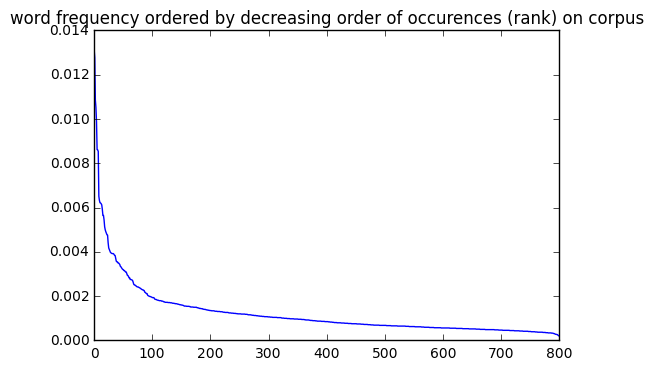

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log


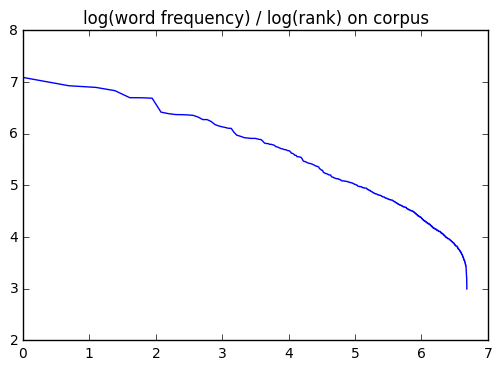

In [3]:
summarize(sentences, V, "corpus")


Not really zipfian so far. Maybe read [that](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005110) if we really care about that.

## Study definitions

800 800 1000


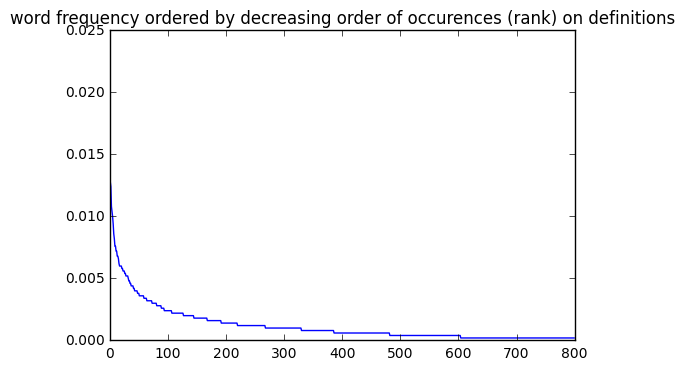

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log


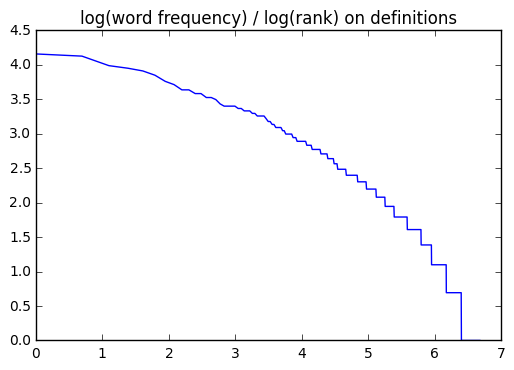

In [4]:
definitions = []
for defs in model.dictionary.values():
    definitions += defs
summarize(definitions, V, "definitions")
